# Datasets and DataLoaders in PyTorch

For better readability and modularity, we can decouple the dataset code from the training code with the two data primitives provided by PyTorch: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`, where `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to each sample.

PyTorch provides some pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset`.

## Loading the Dataset

[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the FashionMNIST Dataset with the following parameters:
- `root` is the path where the train/test data is stored,

- `train` specifies training or test dataset,

- `download=True` downloads the data from the internet if it’s not available at `root`.

- `transform` and `target_transform` specify the feature and label transformations

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [9]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

In [10]:
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizating the Dataset

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

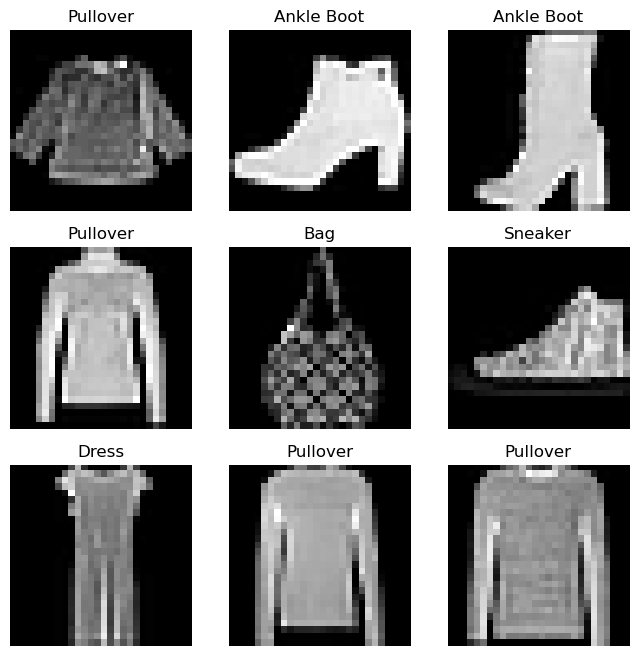

In [13]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Custom Dataset Creation

A custom `Dataset` class must implement three methods: `__init__`, `__len__`, and `__getitem__`, a tyical example is shown below:

In [15]:
import os
import pandas as pd
from torchvision.io import read_image


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing the data for training with DataLoaders

The `Dataset` retrieves the dataset's features and labels one sample at a time. During training, we would usually like to pass the samples in minibatches, then reshuffle the data at every epoch to reduce overfitting, and use Python's `multiprocessing` to speed up the data retrieval, `DataLoader` is a very helpful API in this regard.

In [16]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

Feature batch type: <class 'torch.Tensor'>
Labels batch type: <class 'torch.Tensor'>
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


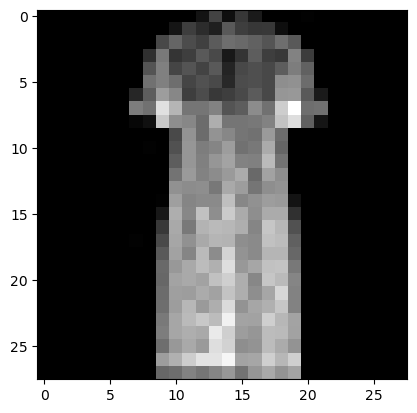

Label: Dress


In [19]:
# display image and label
train_features, train_labels = next(iter(training_dataloader))
print(f'Feature batch type: {type(train_features)}')
print(f'Labels batch type: {type(train_labels)}')
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {labels_map[label.item()]}')